In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
cocacola = pd.read_csv("/content/cocacola_Sales_Rawdata.csv",encoding = 'unicode_escape')
cocacola.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [4]:
cocacola.shape

(42, 2)

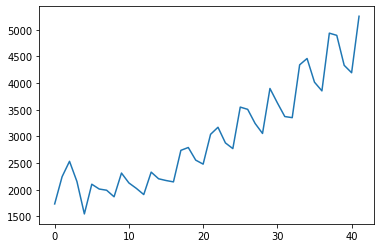

In [5]:
cocacola.Sales.plot()

In [6]:
cocacola['t']=np.arange(1,43)
cocacola["t_squared"] = cocacola["t"]*cocacola["t"]
cocacola["log_Sales"] = np.log(cocacola["Sales"])
cocacola.head()

,Quarter,Sales,t,t_squared,log_Sales
0,Q1_86,1734.827000,1,1,7.458663
1,Q2_86,2244.960999,2,4,7.716443
2,Q3_86,2533.804993,3,9,7.837477
3,Q4_86,2154.962997,4,16,7.675529
4,Q1_87,1547.818996,5,25,7.344602


In [8]:
Quarter_values=cocacola['Quarter'].values

In [9]:
l1=[]
l2=[]
for i in Quarter_values:
  l1.append(i.split('_')[0])
  l2.append(i.split('_')[1])

In [10]:
a=pd.Series(l1)
b=pd.Series(l2)

In [11]:
cocacola.head()

,Quarter,Sales,t,t_squared,log_Sales
0,Q1_86,1734.827000,1,1,7.458663
1,Q2_86,2244.960999,2,4,7.716443
2,Q3_86,2533.804993,3,9,7.837477
3,Q4_86,2154.962997,4,16,7.675529
4,Q1_87,1547.818996,5,25,7.344602


In [12]:
cocacola['Quar']=a
cocacola['Year']=b

In [13]:
Quar_dummies=pd.get_dummies(cocacola['Quar'])
cocacola = cocacola.join(Quar_dummies)
cocacola.head()

,Quarter,Sales,t,t_squared,log_Sales,Quar,Year,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,1,1,7.458663,Q1,86,1,0,0,0
1,Q2_86,2244.960999,2,4,7.716443,Q2,86,0,1,0,0
2,Q3_86,2533.804993,3,9,7.837477,Q3,86,0,0,1,0
3,Q4_86,2154.962997,4,16,7.675529,Q4,86,0,0,0,1
4,Q1_87,1547.818996,5,25,7.344602,Q1,87,1,0,0,0


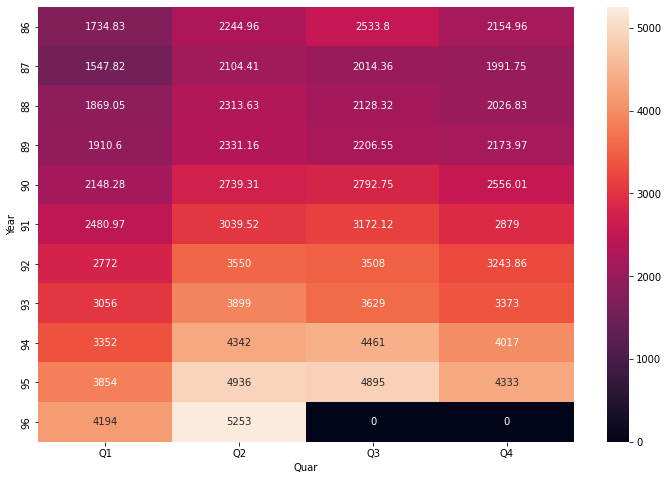

In [15]:
plt.figure(figsize=(12,8))
heatmap_y_quar = pd.pivot_table(data=cocacola,values="Sales",index="Year",columns="Quar",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_quar,annot=True,fmt="g") #fmt is format of the grid values

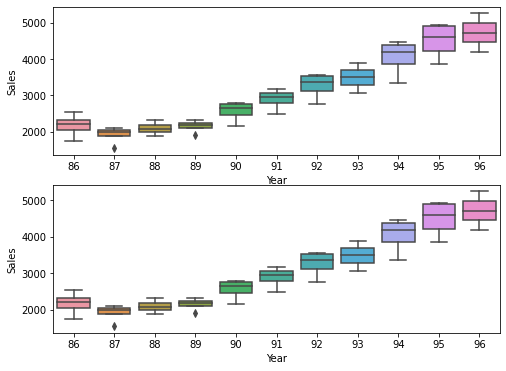

In [16]:
# Boxplot for ever
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="Year",y="Sales",data=cocacola)
plt.subplot(212)
sns.boxplot(x="Year",y="Sales",data=cocacola)

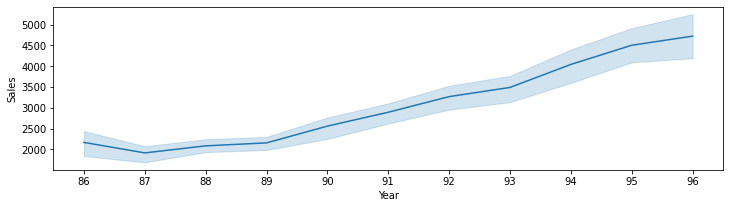

In [17]:
plt.figure(figsize=(12,3))
sns.lineplot(x="Year",y="Sales",data=cocacola)

Splitting Data

In [20]:
Train = cocacola.head(32)
Test = cocacola.tail(10)

In [21]:
#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('Sales~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_linear))**2))
rmse_linear

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


752.923393323219

In [22]:
#Exponential

Exp = smf.ols('log_Sales~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

590.3316432612797

In [23]:
#Quadratic 

Quad = smf.ols('Sales~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_Quad))**2))
rmse_Quad

457.73573555936656

In [24]:
#Additive seasonality 

add_sea = smf.ols('Sales~Q1+Q2+Q3+Q4',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Q1','Q2','Q3','Q4']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea

1850.4665461690342

In [25]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Sales~t+t_squared+Q1+Q2+Q3+Q4',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Q1','Q2','Q3','Q4','t','t_squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

277.351077114746

In [26]:
##Multiplicative Seasonality

Mul_sea = smf.ols('log_Sales~Q1+Q2+Q3+Q4',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

1908.2503948174192

In [27]:
#Multiplicative Additive Seasonality 

Mul_Add_sea = smf.ols('log_Sales~t+Q1+Q2+Q3+Q4',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

448.86781837096817

In [28]:
#Compare the results 

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
4,rmse_add_sea_quad,277.351077
6,rmse_Mult_add_sea,448.867818
2,rmse_Quad,457.735736
1,rmse_Exp,590.331643
0,rmse_linear,752.923393
3,rmse_add_sea,1850.466546
5,rmse_Mult_sea,1908.250395


**model is built on Additive Seasonality Quadratic**

In [29]:
#Build the model on entire data set
model_full = smf.ols('Sales~t+t_squared+Q1+Q2+Q3+Q4',data=Train).fit()

In [30]:
pred_new  = pd.Series(model_full.predict(Test))
pred_new

32    3599.111165
33    4264.178607
34    4311.803302
35    4190.873370
36    4141.181850
37    4823.418475
38    4888.212351
39    4784.451601
40    4751.929264
41    5451.335070
dtype: float64

In [31]:
cocacola.tail(10)

,Quarter,Sales,t,t_squared,log_Sales,Quar,Year,Q1,Q2,Q3,Q4
32,Q1_94,3352.0,33,1089,8.117312,Q1,94,1,0,0,0
33,Q2_94,4342.0,34,1156,8.376090,Q2,94,0,1,0,0
34,Q3_94,4461.0,35,1225,8.403128,Q3,94,0,0,1,0
35,Q4_94,4017.0,36,1296,8.298291,Q4,94,0,0,0,1
36,Q1_95,3854.0,37,1369,8.256867,Q1,95,1,0,0,0
37,Q2_95,4936.0,38,1444,8.504311,Q2,95,0,1,0,0
38,Q3_95,4895.0,39,1521,8.495970,Q3,95,0,0,1,0
39,Q4_95,4333.0,40,1600,8.374015,Q4,95,0,0,0,1
40,Q1_96,4194.0,41,1681,8.341410,Q1,96,1,0,0,0
41,Q2_96,5253.0,42,1764,8.566555,Q2,96,0,1,0,0
